In [1]:

import pygame
import random
import os
import time
import numpy as np
import math
import torch
import torch.nn.functional
import matplotlib.pyplot as plt
import torch.optim as opt
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.colors import LogNorm 
import matplotlib.cm as cm
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from scipy.interpolate import griddata
import torch.nn.functional as F
import torch.distributions as D
if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"  

print(dev)



pygame 2.0.1 (SDL 2.0.14, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


D:\ComputerSoftwares\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


cuda:0


In [2]:
global temp_list
temp_list = []
Agent_number_n=3;
Alpha = 1.0;

echo = 10001
BATCH_SIZE = 64
LR = 0.001           # learning rate for generator
devided_number = 1

uniformlow = 0
uniformhigh = 1.0

normalloc = 0.5
normalscale = 0.1

doublePeakHighMean = 0.9
doublePeakLowMean = 0.1
doublePeakStd = 0.04

beta_a = 0.3
beta_b = 0.2

def Generate_distribution(Agent_number_n):
    #return sorted(np.random.rand(Agent_number_n), reverse=True)
    return np.random.normal(normalloc,normalscale,Agent_number_n)
Prior_Distribution = "normal"

In [3]:
d_1 = D.uniform.Uniform(uniformlow, uniformhigh)
distributionRatio_1 = d_1.cdf(1) - d_1.cdf(0)
distributionBase_1 = d_1.cdf(0)

d_2 = D.normal.Normal(normalloc, normalscale)
distributionRatio_2 = d_2.cdf(1) - d_2.cdf(0)
distributionBase_2 = d_2.cdf(0)

d_3 = D.normal.Normal(doublePeakLowMean, doublePeakStd)
d_4 = D.normal.Normal(doublePeakHighMean, doublePeakStd)
distributionRatio_3 = (d_3.cdf(1) + d_4.cdf(1) - d_3.cdf(0) - d_4.cdf(0)) / 2
distributionBase_3 = d_3.cdf(0) + d_4.cdf(0)

# d_5 = D.beta.Beta(beta_a,beta_b)

# d10 = D.beta.Beta(0.5,0.5)


def cdf(x, y, i=None):
    if (y == "uniform"):
        return (d_1.cdf(x) - distributionBase_1) / distributionRatio_1
    elif (y == "normal"):
        return (d_2.cdf(x) - distributionBase_2) / distributionRatio_2
    elif (y == "twopeak"):
        return (d_3.cdf(x) + d_4.cdf(x) -
                distributionBase_3) / 2 / distributionRatio_3


def pdf(x, y, i=None):
    x= x.cpu().type(torch.float32)
    if (y == "uniform"):
        return torch.pow(torch.tensor(10.0), d_1.log_prob(x)).to(dev)
    elif (y == "normal"):
        return torch.pow(torch.tensor(10.0), d_2.log_prob(x)).to(dev)
    elif (y == "twopeak"):
        return (torch.pow(torch.tensor(10.0), d_3.log_prob(x)) +
                torch.pow(torch.tensor(10.0), d_4.log_prob(x))).to(dev) / 2 
    
def Generate_distribution(Agent_number_n):
    return np.random.rand(Agent_number_n)
    #return np.random.normal(normalloc,normalscale,Agent_number_n)


In [4]:
print(torch.tensor(10.0).to(dev))
print(pdf(torch.ones(1)*0.2,"uniform"))
print(pdf(torch.ones(1)*0.2,"normal"))


tensor(10., device='cuda:0')
tensor([1.], device='cuda:0')
tensor([0.0008], device='cuda:0')


In [5]:
def appen(_x_list,y):
    global temp_list
    temp_list.append(_x_list)
    
def appen_train(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
        
    temp_list = np.array(temp_list)
    x_list = np.array(x_list)
    return temp_list,S,x_list



def appen_test(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    testing_data.append(temp_list)
    testing_label.append(S)
    temp_list = np.array(temp_list)
    return temp_list,S

def read_testing_data():
    for i in range(10000):
        appen_test(Generate_distribution(Agent_number_n));
                            

testing_data=[]
testing_label=[]
S=1.0
read_testing_data();

testing_data=np.array(testing_data)
testing_label=np.array(testing_label)
print(testing_data)
print(testing_label)

[[[0.07585866 0.85326448]
  [0.98249765 0.85326448]
  [0.98249765 0.07585866]]

 [[0.23685011 0.26610213]
  [0.62566927 0.26610213]
  [0.62566927 0.23685011]]

 [[0.75052029 0.66801841]
  [0.00298759 0.66801841]
  [0.00298759 0.75052029]]

 ...

 [[0.476047   0.89863924]
  [0.47998588 0.89863924]
  [0.47998588 0.476047  ]]

 [[0.77897405 0.46279358]
  [0.84599801 0.46279358]
  [0.84599801 0.77897405]]

 [[0.2628394  0.91362024]
  [0.60701514 0.91362024]
  [0.60701514 0.2628394 ]]]
[1.91162079 1.12862152 1.42152629 ... 1.85467212 2.08776565 1.78347477]


In [6]:
def h_3_star(a, b, t):
    return a - min(a, t) + b - min(b, t) + max(min(a, t)+min(b, t), 2*t/3) + 1/2 * max(min(a, t)+min(b, t), t) - 1/2 * max(max(min(a, t), min(b, t)), 2*t/3) - t/6


def f_function(a, b, z):
    if(z >= 1):
        return (a+b)/2 + z/3
    else:
        return z/3 + h_3_star(a, b, 1-z)/2

def h_function(input_list):
    #input_list = sorted(input_list)
    g_list = []
    for j1 in range(len(input_list) ):
        for j2 in range(len(input_list)):
            if(j1 != j2):
                a = input_list[j1]
                b = input_list[j2]
                z = sum(input_list)- a-b

                g_list.append( f_function(a, b, z) * (Agent_number_n-1))
    h = sum(g_list) * 3 /  (Agent_number_n) /  (Agent_number_n-1) /  (Agent_number_n - 2)
    return h
                
                
x_list = []
y_list = []
z_list = []
result_list = []
for index in range(len(testing_data)):
    h_list = []
    for i in range(Agent_number_n):
        x_list.append(testing_data[index][i][0])
        y_list.append(testing_data[index][i][1])
        h = h_function(testing_data[index][i])
        z_list.append(float(h))
        h_list.append(float(h))
    result_list.append(sum(h_list)/testing_label[index]) 
    
    
print(max(result_list), min(result_list), max(result_list)-min(result_list),sum(result_list)/len(result_list))

2.3331922097769358 2.0 0.33319220977693575 2.1015085826641724


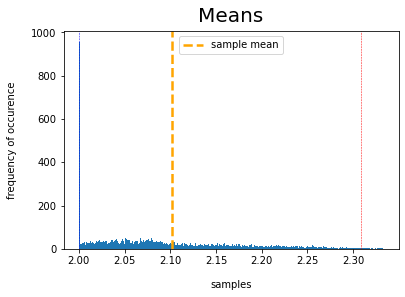

In [7]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.01)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.99)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()

In [8]:
tensor_sample_list,indices = torch.sort(torch.rand(devided_number,requires_grad=True).to(dev))  # random ideas\n
print(tensor_sample_list)

tensor([0.9265], device='cuda:0', grad_fn=<SortBackward>)


In [9]:
print(cdf(tensor_sample_list,Prior_Distribution))
print(cdf(tensor_sample_list,"normal"))

tensor([1.0000], device='cuda:0', grad_fn=<DivBackward0>)
tensor([1.0000], device='cuda:0', grad_fn=<DivBackward0>)


In [10]:
def weight_init(m):
    if isinstance(m, torch.nn.Conv2d):
        torch.nn.init.xavier_normal_(m.weight)
        torch.nn.init.zeros_(m.bias)
    elif isinstance(m, torch.nn.Linear):
        torch.nn.init.xavier_normal_(m.weight)
        torch.nn.init.normal_(m.bias, mean=0.0, std=0.01)



def redistribution_value_function(input_tensor):
    S = torch.max(torch.sum(input_tensor), torch.ones(1).to(dev))
    temp_list = []

    for i in range(Agent_number_n):
        temp = []

        for j in range(Agent_number_n):
            if(i != j):
                temp .append(input_tensor[j])

        temp = torch.stack(temp)
        temp_list.append(temp)
    return torch.stack(temp_list), S


class Net(torch.nn.Module):
    def __init__(self):

        super(Net, self).__init__()

        self.input_dim = (Agent_number_n-1)
        self.hidden_dim = 100
        self.output_dim = 1
        self.hidden_layer_count = 6

        current_dim = self.input_dim
        self.layers = torch.nn.ModuleList()
        for i in range(self.hidden_layer_count):
            self.layers.append(torch.nn.Linear(current_dim, self.hidden_dim))
            current_dim = self.hidden_dim
        self.layers.append(torch.nn.Linear(current_dim, self.output_dim))

    def calculate(self, value_list):
        h = value_list
        for layer in self.layers:
            h = torch.relu(layer(h))
        return h

    def forward(self, input_list, input_label, input_data):
        global iteration, echo, target_order
        loss1 = 0
        loss2 = 0
        input_list = torch.from_numpy(
            np.array(input_list)).to(dev).type(torch.float32)

        input_data = torch.from_numpy(
            np.array(input_data)).to(dev).type(torch.float32)
        
        input_label = torch.from_numpy(
            np.array(input_label)).to(dev).type(torch.float32)
        
        
        random_index = random.randint(0, Agent_number_n-1)
        tensor_sample_list,indices = torch.sort(torch.rand(devided_number,requires_grad=True).to(dev))
     
        tensor_sample = torch.rand(devided_number,requires_grad=True)[0].to(dev)
    
        input_data_temp = input_data.detach().clone()
        
        input_data_temp[random_index] = tensor_sample

        value_list_tensor, S_tensor = redistribution_value_function(
            input_data_temp)
       
        h_list = []
        for i in range(Agent_number_n):
            h = self.calculate(
                value_list_tensor[i].to(dev).type(torch.float32))
            h_list.append(h)
            
        S_tensor = S_tensor.detach().to(dev).type(torch.float32)
        
        sum_h = torch.sum(torch.cat(h_list)).to(dev)
        
        temp_loss1 = torch.where((Agent_number_n-1)*S_tensor > sum_h,
                 torch.square(((Agent_number_n-1)*S_tensor - sum_h)),
                 torch.zeros(1).to(dev)
              )

        temp_loss2 = torch.where((Agent_number_n-Alpha)*S_tensor < sum_h,
                    torch.square((sum_h-(Agent_number_n-Alpha)*S_tensor))/10000,
                    torch.zeros(1).to(dev)
                  )


        loss1 = temp_loss1 * pdf(tensor_sample, Prior_Distribution)
        loss2 = temp_loss2 * pdf(tensor_sample, Prior_Distribution)
                
        return loss1, loss2

In [11]:
random.seed(200)
torch.manual_seed(256)
net  = Net()
net.apply(weight_init)
#net = torch.load("save/Deep_learning_F_3_1")
net.to(dev)

#optimizer = opt.RMSprop(net.parameters(), lr=0.00001)
#optimizer = opt.SGD(net.parameters(), lr=0.00005)
optimizer = opt.Adam(net.parameters(), lr=LR)
#optimizer = opt.Adadelta(net.parameters(), lr=1.0)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.95)
index_train_list = []
index_test_list = []
train_losses = []
test_losses = []

In [12]:
for iteration in range(int(echo)):
    
    temp_number = 0
    total_batch_loss = 0 
        
    loss2_list = []
    loss1_sum = 0
    loss2_sum = 0
    denominator = 0
    for index in range(0, BATCH_SIZE):
        training_data_i, training_label, training_data = appen_train(
            Generate_distribution(Agent_number_n))
        h_loss1, h_loss2 = net(training_data_i, training_label,
                                       training_data)
        denominator += 1
        loss1_sum += h_loss1
        loss2_sum += h_loss2

    loss_sum = torch.sum(loss1_sum + loss2_sum)
    loss = (loss_sum) / denominator 
    total_batch_loss +=float(loss_sum)
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    temp_number = iteration
    index_train_list.append(iteration)
    train_losses.append(total_batch_loss)
    if (iteration%50 == 0):
        print(temp_number, loss, float(loss1_sum), float(loss2_sum))

        print("batch iteration", iteration)
        print("batch_loss: %.4f " % total_batch_loss)

        result_list = []
        for index in range(len(testing_data)):
            h_list = []
            for i in range(Agent_number_n):
                h = net.calculate(
                    torch.tensor(testing_data[index][i]).to(dev).type(
                        torch.float32))
                h_list.append(float(h))
            result_list.append(sum(h_list) / testing_label[index])
        print(max(result_list), min(result_list),
              max(result_list) - min(result_list),
              (sum(result_list) / len(result_list) - min(result_list))+ Agent_number_n-1 - min(min(result_list),Agent_number_n-1) )

        index_test_list.append(iteration)
        test_losses.append(
            (sum(result_list) / len(result_list) - min(result_list))+ Agent_number_n-1 - min(min(result_list),Agent_number_n-1) )
        print()
        
    scheduler.step()


0 tensor(56.2376, device='cuda:0', grad_fn=<DivBackward0>) 3599.205078125 0.0
batch iteration 0
batch_loss: 3599.2051 
0.15017423427249335 0.0600567768798659 0.09011745739262744 1.9853321632552643

50 tensor(0.0225, device='cuda:0', grad_fn=<DivBackward0>) 0.0 1.4368414878845215
batch iteration 50
batch_loss: 1.4368 
14.144741719084212 6.725569030727346 7.419172688356866 2.5332310543409786

100 tensor(0.0008, device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.05386172607541084
batch iteration 100
batch_loss: 0.0539 
4.556052632185778 2.2309361716230396 2.325116460562738 0.8571170074227483

150 tensor(0.0011, device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.07255879789590836
batch iteration 150
batch_loss: 0.0726 
4.697666466001199 2.395625487187991 2.302040978813208 0.8773441446286694

200 tensor(0.0004, device='cuda:0', grad_fn=<DivBackward0>) 0.006437599193304777 0.02137557975947857
batch iteration 200
batch_loss: 0.0278 
3.493988269581217 1.8697839159200709 1.6242043536611463 0.7997986265

2.602874816197359 1.860403835773468 0.7424709804238909 0.4795725685460952

2000 tensor(4.4245e-05, device='cuda:0', grad_fn=<DivBackward0>) 0.0001545533596072346 0.0026770990807563066
batch iteration 2000
batch_loss: 0.0028 
2.611431715232166 1.9173180491470605 0.6941136660851055 0.35991502365208694

2050 tensor(5.8948e-05, device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.003772687166929245
batch iteration 2050
batch_loss: 0.0038 
2.7870318520077686 2.0078118393188493 0.7792200126889193 0.3024596342957877

2100 tensor(4.2799e-05, device='cuda:0', grad_fn=<DivBackward0>) 5.431074860673402e-12 0.0027391421608626842
batch iteration 2100
batch_loss: 0.0027 
2.6082870886324714 1.921301007270813 0.6869860813616584 0.3489666282753041

2150 tensor(4.2071e-05, device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.002692542737349868
batch iteration 2150
batch_loss: 0.0027 
2.6119395800329177 1.937756597995758 0.6741829820371597 0.3221580184684676

2200 tensor(0.0001, device='cuda:0', grad_fn=<DivBackward

3850 tensor(1.0694e-05, device='cuda:0', grad_fn=<DivBackward0>) 1.7341306374873966e-05 0.0006670815055258572
batch iteration 3850
batch_loss: 0.0007 
2.6400213902581067 1.9602967281263222 0.6797246621317845 0.18799436640132794

3900 tensor(2.2675e-05, device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0014512226916849613
batch iteration 3900
batch_loss: 0.0015 
2.701956536501024 1.9888995289802551 0.713057007520769 0.1771977249108545

3950 tensor(1.0185e-05, device='cuda:0', grad_fn=<DivBackward0>) 6.560267502209172e-05 0.0005862556281499565
batch iteration 3950
batch_loss: 0.0007 
2.6524532646577907 1.967237114906311 0.6852161497514797 0.18356310704075085

4000 tensor(6.0138e-06, device='cuda:0', grad_fn=<DivBackward0>) 4.086918488610536e-05 0.0003440170839894563
batch iteration 4000
batch_loss: 0.0004 
2.6394228013639123 1.9498773217201233 0.689545479643789 0.21174743967760135

4050 tensor(1.6066e-05, device='cuda:0', grad_fn=<DivBackward0>) 0.00013137745554558933 0.0008968376787379384


5700 tensor(3.6157e-06, device='cuda:0', grad_fn=<DivBackward0>) 4.346699279267341e-05 0.0001879391202237457
batch iteration 5700
batch_loss: 0.0002 
2.669203772262557 1.9723401069641113 0.6968636652984457 0.15089360262368645

5750 tensor(6.0593e-06, device='cuda:0', grad_fn=<DivBackward0>) 2.391691111824912e-07 0.0003875545517075807
batch iteration 5750
batch_loss: 0.0004 
2.6528444149247394 1.9659399390220642 0.6869044759026752 0.1554278884767415

5800 tensor(1.0827e-05, device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0006929028895683587
batch iteration 5800
batch_loss: 0.0007 
2.6687270400256327 1.9808335900306702 0.6878934499949625 0.13334114774457806

5850 tensor(6.5042e-06, device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0004162709228694439
batch iteration 5850
batch_loss: 0.0004 
2.6806347109698847 1.9782685041427612 0.7023662068271235 0.1487022101860731

5900 tensor(1.1900e-05, device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0007615716313011944
batch iteration 5900
batch_loss: 0.0

2.6742410092071216 1.9868258833885193 0.6874151258186023 0.11784493230427673

7600 tensor(6.8380e-06, device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.00043763176654465497
batch iteration 7600
batch_loss: 0.0004 
2.684873492713548 1.9910132884979248 0.693860204215623 0.11862311373399281

7650 tensor(4.0709e-06, device='cuda:0', grad_fn=<DivBackward0>) 1.9284831068944186e-05 0.00024125083291437477
batch iteration 7650
batch_loss: 0.0003 
2.6548072786108308 1.9746941328048706 0.6801131458059602 0.13205482022430637

7700 tensor(6.9543e-06, device='cuda:0', grad_fn=<DivBackward0>) 4.910497564125649e-10 0.0004450756823644042
batch iteration 7700
batch_loss: 0.0004 
2.6630652505792547 1.9832170009613037 0.679848249617951 0.1198102768648468

7750 tensor(1.3638e-06, device='cuda:0', grad_fn=<DivBackward0>) 7.314908227751271e-13 8.728061220608652e-05
batch iteration 7750
batch_loss: 0.0001 
2.6575173564093206 1.978839030019222 0.6786783263900986 0.12268684447260814

7800 tensor(3.2581e-06, device

9450 tensor(6.0220e-06, device='cuda:0', grad_fn=<DivBackward0>) 0.0002578173589427024 0.00012759097444359213
batch iteration 9450
batch_loss: 0.0004 
2.6506522696057098 1.9732353687286377 0.6774169008770721 0.1301111875911154

9500 tensor(2.6355e-06, device='cuda:0', grad_fn=<DivBackward0>) 4.023709809786169e-09 0.00016866678197402507
batch iteration 9500
batch_loss: 0.0002 
2.654585488800208 1.9726134538650513 0.6819720349351566 0.13139012834028785

9550 tensor(1.2400e-06, device='cuda:0', grad_fn=<DivBackward0>) 0.0 7.936182373668998e-05
batch iteration 9550
batch_loss: 0.0001 
2.6687446263593975 1.9852842092514038 0.6834604171079937 0.11504552581007754

9600 tensor(1.1268e-06, device='cuda:0', grad_fn=<DivBackward0>) 0.0 7.211472257040441e-05
batch iteration 9600
batch_loss: 0.0001 
2.6545849540806 1.9755052328109741 0.679079721269626 0.12529396672542692

9650 tensor(2.6413e-06, device='cuda:0', grad_fn=<DivBackward0>) 8.855992928147316e-05 8.048192103160545e-05
batch iteration 965

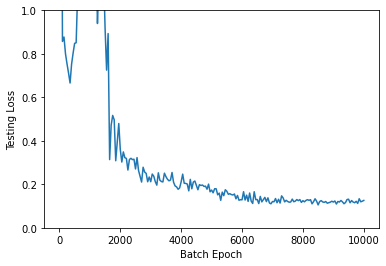

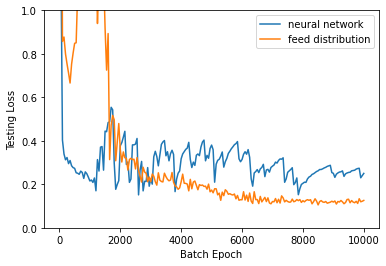

In [14]:
plt.ylim(0, 1.0)
plt.plot(index_test_list,test_losses)
plt.ylabel('Testing Loss')
plt.xlabel('Batch Epoch')
plt.show()

import csv
with open('save/test_loss_feed_normal_3.csv', 'w', newline='') as csvfile_feed:
    spamwriter = csv.writer(csvfile_feed)
    spamwriter.writerow(index_test_list)
    spamwriter.writerow(test_losses)


with open('save/test_loss_unfeed_normal_3.csv') as csvfile_unfeed:
    reader = csv.reader(csvfile_unfeed)
    list_feed = []
    for row in reader:
        row = np.array(row)
        temp_list = []
        for i in range(len(row)):
            temp_list.append(float(row[i]))

        list_feed.append(temp_list)
    plt.ylim(0, 1.0)
    plt.plot(list_feed[0],list_feed[1],label='neural network')
    plt.plot(index_test_list,test_losses,label='feed distribution')
    plt.ylabel('Testing Loss')
    plt.xlabel('Batch Epoch')
    #plt.title('Two or more lines on same plot with suitable legends ')
    # show a legend on the plot
    plt.legend()
    plt.show()


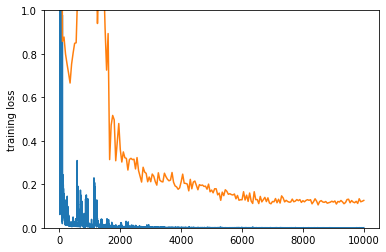

In [15]:
plt.ylim(0, 1.0)

plt.plot(index_train_list,train_losses)
plt.ylabel('training loss')

plt.plot(index_test_list,test_losses)
plt.ylabel('training loss')

plt.show()

In [16]:
torch.save(net, "save/Deep_learning_F_normal_3_1")

In [17]:
denominator = 0
result_list = []
for index in range(len(testing_data)):
    h_list = []
    for i in range(Agent_number_n):
        h = net.calculate(torch.tensor(testing_data[index][i]).cuda().type(torch.float32))
        h_list.append(float(h))
    
    #print(sum(h_list),h_list,sum(h_list)/testing_label[index])
    result_list.append(sum(h_list)/testing_label[index])
    

print(max(result_list),min(result_list),max(result_list)-min(result_list),sum(result_list)/len(result_list)-min(result_list))

2.6539652734685455 1.974632978439331 0.6793322950292144 2.07516785133218


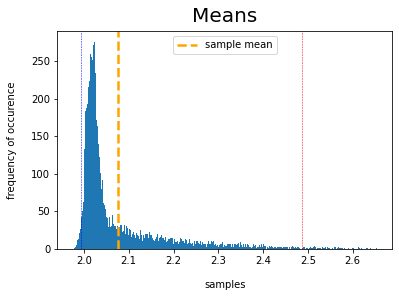

In [18]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.01)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.99)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()

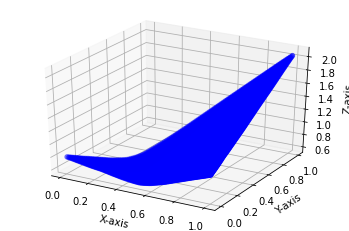

In [19]:

# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Generate the values
x_vals = []
y_vals = []
z_vals = []
x_ = np.linspace(0.0,1.0,101)
y_ = np.linspace(0.0,1.0,101)

result_list = []
for i in range(len(x_)):
    for j in range(0,i):
        h = net.calculate(torch.tensor([x_[i],y_[j]]).cuda().type(torch.float32))
        x_vals.append(x_[i])
        y_vals.append(y_[j])
        z_vals.append(float(h))


# Plot the values
ax.scatter(x_vals, y_vals, z_vals, c = 'b', marker='o')


ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')



plt.show()

In [20]:
fig = px.scatter_3d(z=z_vals, x=x_vals, y=y_vals)

fig.show()

In [21]:
# def h_function(input_list):

#     h = max(sum(input_list),2/3) + 1/2 * max(sum(input_list),1) - 1/2 * max(input_list[0],2/3) - 1/6
#     return h

def h_function(input_list):
    if(sum(input_list)>=2/3):
        h = sum(input_list)
    else:
        h = 2/3
    return h   
                
x_list2 = []
y_list2 = []
z_list2 = []
result_list = []
for index in range(len(training_data)):
    h_list = []
    for i in range(Agent_number_n):
        x_list2.append(testing_data[index][i][0])
        y_list2.append(testing_data[index][i][1])
        h = h_function(testing_data[index][i])
        z_list2.append(float(h))
        h_list.append(float(h))
    result_list.append(sum(h_list)/testing_label[index]) 
    
    
print(max(result_list), min(result_list), max(result_list)-min(result_list),sum(result_list)/len(result_list))
fig = px.scatter_3d(z=z_list2[:10000], x=x_list2[:10000], y=y_list2[:10000])

fig.show()

2.1450569706082114 2.0 0.14505697060821143 2.0483523235360703


In [22]:
# def h_function(input_list):

#     h = max(sum(input_list),2/3) + 1/2 * max(sum(input_list),1) - 1/2 * max(input_list[0],2/3) - 1/6
#     return h

def h_function(input_list):
    if(sum(input_list)>=2/3):
        h = sum(input_list)
    else:
        h = 2/3-sum(input_list)*1/16+1/24
    return h   
                
x_list2 = []
y_list2 = []
z_list2 = []
result_list = []
for index in range(len(training_data)):
    h_list = []
    for i in range(Agent_number_n):
        x_list2.append(testing_data[index][i][0])
        y_list2.append(testing_data[index][i][1])
        h = h_function(testing_data[index][i])
        z_list2.append(float(h))
        h_list.append(float(h))
    result_list.append(sum(h_list)/testing_label[index]) 
    
    
print(max(result_list), min(result_list), max(result_list)-min(result_list),sum(result_list)/len(result_list))
fig = px.scatter_3d(z=z_list2[:10000], x=x_list2[:10000], y=y_list2[:10000])

fig.show()

2.154123031271225 2.0 0.15412303127122495 2.051374343757075


In [23]:
# def h_function(input_list):

#     h = max(sum(input_list),2/3) + 1/2 * max(sum(input_list),1) - 1/2 * max(input_list[0],2/3) - 1/6
#     return h

def h_function(input_list):

    h = max(sum(input_list),2/3) + 1/2 * max(sum(input_list),1) - 1/2 * max(input_list[0],2/3) - 1/6
    return h   
                
x_list1 = []
y_list1 = []
z_list1 = []
result_list = []
for index in range(len(training_data)):
    h_list = []
    for i in range(Agent_number_n):
        x_list1.append(testing_data[index][i][0])
        y_list1.append(testing_data[index][i][1])
        h = h_function(testing_data[index][i])
        z_list1.append(float(h))
        h_list.append(float(h))
    result_list.append(sum(h_list)/testing_label[index]) 
    
    
print(max(result_list), min(result_list), max(result_list)-min(result_list),sum(result_list)/len(result_list))
fig = px.scatter_3d(z=z_list1[:10000], x=x_list1[:10000], y=y_list1[:10000])

fig.show()

2.1450569706082114 2.0686476304695662 0.0764093401386452 2.1104749754964693


In [24]:
fig = px.scatter_3d(z=z_list[:10000], x=x_list[:10000], y=y_list[:10000])

fig.show()

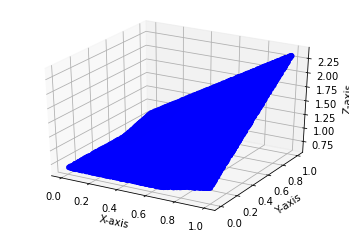

In [25]:
# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Generate the values

# Plot the values
ax.scatter(x_list, y_list, z_list, c = 'b', marker='o')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

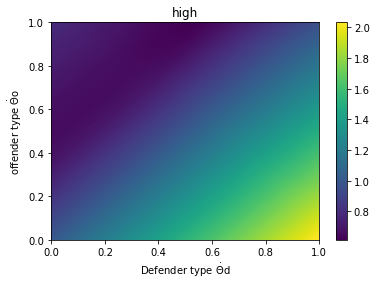

In [26]:
o_frame = np.linspace(0.0,1.0,101)
    
#o* = argmax_o { (2 * theta_O - 400)(o-o*o/2) + (2 * theta_D - 15)(1-o)  }

grid_x, grid_y = np.mgrid[0:1:400j, 0:1:400j]

points =np.reshape([x_vals,y_vals],(2,-1))

points = np.transpose(points)

grid_z2 = griddata(points, z_vals, (grid_x, grid_y), method='nearest')


im =plt.imshow(grid_z2.T, extent=(0,1,0,1) , aspect='auto',interpolation='bilinear')
plt.colorbar(im)
plt.title('high')
plt.xlabel(r"Defender type $\dot{\Theta}$d")
plt.ylabel(r"offender type $\dot{\Theta}$o")
plt.show()